In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
model_deploy = keras.models.load_model('/content/drive/MyDrive/Rice_leaf_disease_prediction_CNN_model.h5')

In [3]:
IMG_HEIGHT = 230
IMG_WIDTH = 790
BATCH_SIZE = 8

In [4]:
train_dir = '/content/drive/MyDrive/Rice leaf disease data/train'
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 labels = 'inferred',
                                                                 label_mode = 'int',
                                                                 seed = 42,
                                                                 shuffle = True,
                                                                 image_size = (IMG_HEIGHT, IMG_WIDTH),
                                                                 batch_size = BATCH_SIZE)

Found 98 files belonging to 3 classes.


In [5]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1/255) 

In [6]:
test_dir = '/content/drive/MyDrive/Rice leaf disease data/test'
test_gen = test_datagen.flow_from_directory(test_dir,
                                            seed = 42,
                                            shuffle = False,
                                            target_size = (IMG_HEIGHT, IMG_WIDTH),
                                            batch_size = 1,
                                            class_mode = 'sparse')

Found 9 images belonging to 3 classes.


In [7]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                seed = 42,
                                                                shuffle = False,
                                                                image_size = (IMG_HEIGHT, IMG_WIDTH),
                                                                batch_size = BATCH_SIZE)

Found 9 files belonging to 3 classes.


In [8]:
class_names = test_data.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

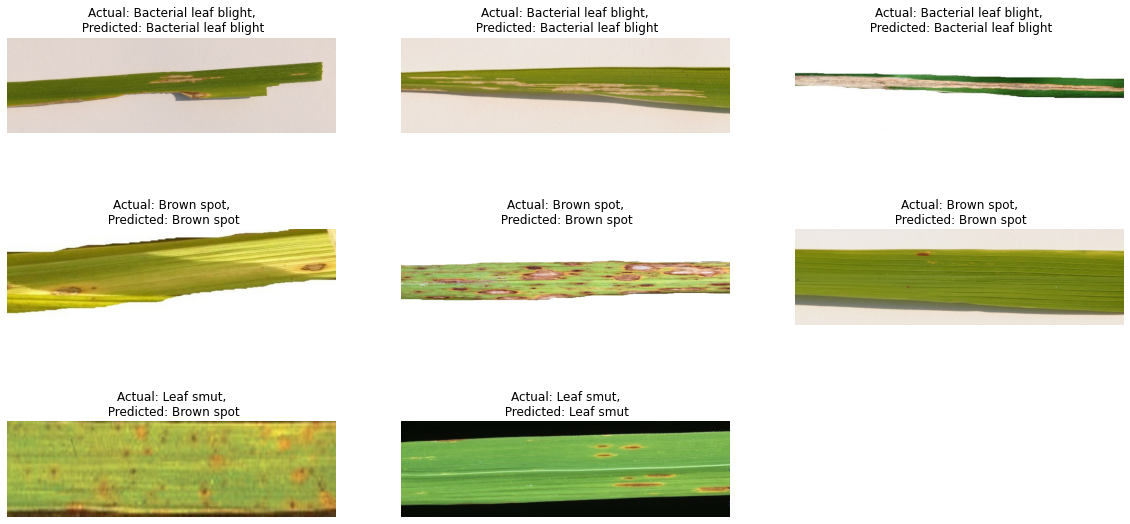

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for image_batch, labels_batch in test_data.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))                     
        
        actual_class = class_names[labels_batch[i]]                           
        
        prediction = model_deploy.predict(image_batch)                                
        predicted_class = class_names[np.argmax(prediction[i])]                
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")

In [10]:
scores = model_deploy.evaluate(test_gen, verbose=1)

9/9 [==============================] - 1s 42ms/step - loss: 0.4228 - accuracy: 0.7778


In [11]:
scores

[0.4228019714355469, 0.7777777910232544]

In [12]:
print('Test accuarcy: {:0.2f}%'.format(scores[1] * 100))

Test accuarcy: 77.78%
